In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

In [15]:
yf.download("BTC","2020-01-01","2020-09-30").Close.to_frame()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC: Data doesn't exist for startDate = 1577833200, endDate = 1601416800


,Close
Date,


In [1]:
class FinancialInstrument():
    pass

In [53]:
stock = FinancialInstrument

In [54]:
stock


__main__.FinancialInstrument

In [82]:
class FinancialInstrument():
    def __init__(self,ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end= {})".format(self._ticker, self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={"Close":"price"}, inplace = True)
        self.data= raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        plt.title("Price Chart:{}".format(self._ticker), fontsize = 15)
        
    def plot_returns(self, kind= "ts"):
        if kind =="ts":
            self.data.log_returns.plot(figsize=(12,8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind=="hist":
            self.data.log_returns.hist(figsize=(12,8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))
    
    

In [83]:
stock = FinancialInstrument("AMD", "2019-09-12", "2021-09-12")

[*********************100%***********************]  1 of 1 completed


In [88]:
stock.std_returns()

0.031742112817321

In [89]:
stock.annualized_perf()

Return: 0.631 | Risk: 0.504


In [87]:
stock.mean_return("w")

0.011845446012126717

In [80]:
stock.set_ticker("TSLA")

[*********************100%***********************]  1 of 1 completed


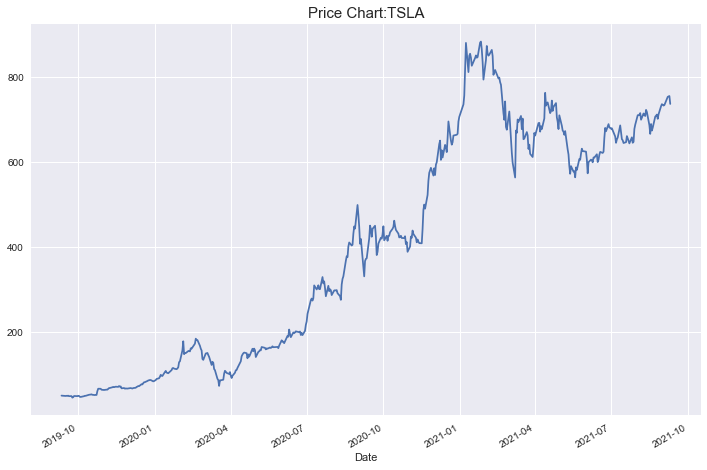

In [81]:
stock.plot_prices()

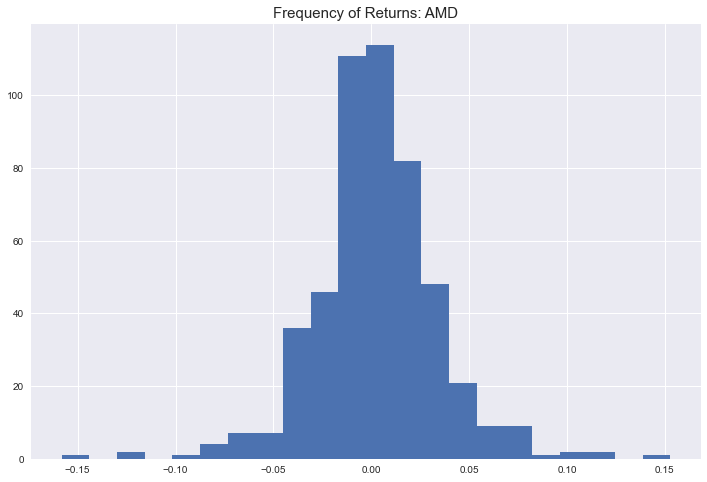

In [73]:
stock.plot_returns('hist')

In [57]:
stock.data

,price,log_returns
Date,,
2019-09-11,29.760000,NaN
2019-09-12,30.209999,0.015008
2019-09-13,30.690001,0.015764
2019-09-16,30.830000,0.004551
2019-09-17,30.990000,0.005176
...,...,...
2021-09-03,109.919998,0.006572
2021-09-07,109.150002,-0.007030
2021-09-08,106.169998,-0.027682


In [59]:
stock.log_returns()

In [74]:
stock.start

'2019-09-12'

In [9]:
stock.end

'2021-09-12'

In [39]:
stock.get_data()

[*********************100%***********************]  1 of 1 completed


,price
Date,
2019-09-11,29.760000
2019-09-12,30.209999
2019-09-13,30.690001
2019-09-16,30.830000
2019-09-17,30.990000
...,...
2021-09-03,109.919998
2021-09-07,109.150002
2021-09-08,106.169998
